<a href="https://colab.research.google.com/github/NhatTan-uit/IS353-BasicDatamining-SocialMedia/blob/main/playstation4games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/IS217_final_project_dataset/playstation_4_games.csv', usecols=["Publisher","CompletionTime(Hours)"])

df.dropna(subset=["Publisher","CompletionTime(Hours)"], inplace=True)
df.drop_duplicates(subset=["Publisher","CompletionTime(Hours)"], inplace=True)

df


,Publisher,CompletionTime(Hours)
0,Webnetics,0-1
2,Jackbox Games,0-1
3,Digital Extremes,35-40
4,Nacon,20-25
5,eastasiasoft,0-1
...,...,...
1454,PM Studios,30-35
1455,Funcom,20-25
1460,Team17 Software,80-100
1475,Spike Chunsoft,35-40


In [ ]:
import pandas as pd
dfsub = pd.read_csv('/content/drive/MyDrive/IS217_final_project_dataset/subgraph.csv', usecols=["Publisher","CompletionTime(Hours)"])

dfsub.dropna(subset=["Publisher","CompletionTime(Hours)"], inplace=True)
dfsub.drop_duplicates(subset=["Publisher","CompletionTime(Hours)"], inplace=True)

dfsub

,Publisher,CompletionTime(Hours)
0,Webnetics,0-1
1,Jackbox Games,0-1
2,eastasiasoft,0-1
3,eastasiasoft,100-120
4,Sprakelsoft,0-1
5,Whitethorn Digital,0-1
6,ChiliDog Interactive,0-1
7,Bethesda Softworks,15-20
8,Bethesda Softworks,40-50
9,Bethesda Softworks,20-25


In [ ]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
Bsub = nx.Graph()
tghoanthanhgame = dfsub['CompletionTime(Hours)']
nhaphathanhgame = dfsub['Publisher']
print("Số lượng khoảng thời gian ước tính hoàn thành game: ",tghoanthanhgame.nunique())
print("Số lượng nhà phát hành game: ",nhaphathanhgame.nunique())
print("Số lượng cạnh", len(dfsub))

Số lượng khoảng thời gian ước tính hoàn thành game:  12
Số lượng nhà phát hành game:  10
Số lượng cạnh 28


In [ ]:
for index, row in dfsub.iterrows():
  Bsub.add_edge(row['Publisher'], row['CompletionTime(Hours)'],weight=1)
Bsub.add_nodes_from(nhaphathanhgame,bipartite = 0)
Bsub.add_nodes_from(tghoanthanhgame,bipartite = 1)

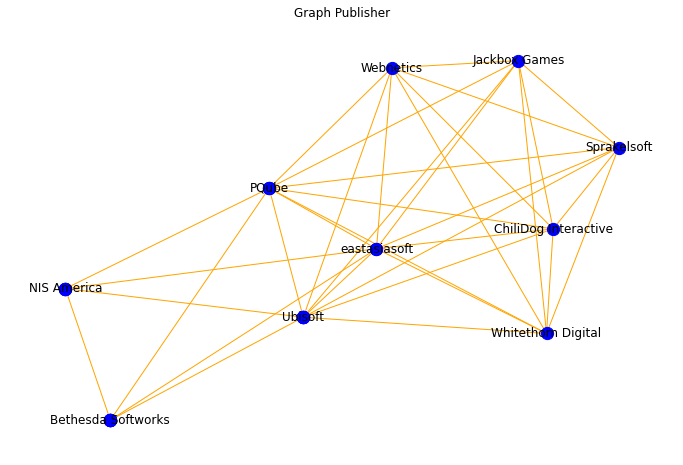

In [ ]:
subG = bipartite.weighted_projected_graph(Bsub,nhaphathanhgame)
plt.figure(figsize=(12,8))

layoutsub = nx.spring_layout(subG)

nx.draw_networkx_nodes(subG,
                       layoutsub,
                       nodelist=nhaphathanhgame,
                       node_size=150,
                       node_color='blue')
nx.draw_networkx_edges(subG, layoutsub, edge_color="orange")
node_labels = dict(zip(nhaphathanhgame, nhaphathanhgame))
nx.draw_networkx_labels(subG, layoutsub, labels=node_labels)
plt.axis('off')

plt.title("Graph Publisher")

plt.show()

In [ ]:
b=nx.betweenness_centrality(subG)

for k , v in reversed(sorted(b.items(), key=lambda item: item[1])):
  print(k,':',v)

Ubisoft : 0.09259259259259257
PQube : 0.09259259259259257
eastasiasoft : 0.09259259259259257
NIS America : 0.0
Bethesda Softworks : 0.0
ChiliDog Interactive : 0.0
Whitethorn Digital : 0.0
Sprakelsoft : 0.0
Jackbox Games : 0.0
Webnetics : 0.0


In [ ]:
labels = nx.get_edge_attributes(subG,'weight')
df2sub = pd.DataFrame(columns=['source', 'target', 'weight'])
for key, value in labels.items():
  df2sub =df2sub.append({'source':key[0],'target':key[1],'weight':value}, ignore_index=True)
df2sub.to_csv(r'subgrapthdata.csv', index = False, header=True)

In [ ]:
df = df.head(150)

In [ ]:
import networkx as nx
from networkx.algorithms import bipartite
B = nx.Graph()
tghoanthanhgame = df['CompletionTime(Hours)']
nhaphathanhgame = df['Publisher']
print("Số lượng khoảng thời gian ước tính hoàn thành game: ",tghoanthanhgame.nunique())
print("Số lượng nhà phát hành game: ",nhaphathanhgame.nunique())
print("Số lượng cạnh", len(df))

Số lượng khoảng thời gian ước tính hoàn thành game:  14
Số lượng nhà phát hành game:  90
Số lượng cạnh 150


In [ ]:
for index, row in df.iterrows():
  B.add_edge(row['Publisher'], row['CompletionTime(Hours)'],weight=1)
B.add_nodes_from(nhaphathanhgame,bipartite = 0)
B.add_nodes_from(tghoanthanhgame,bipartite = 1)

<Figure size 864x864 with 0 Axes>

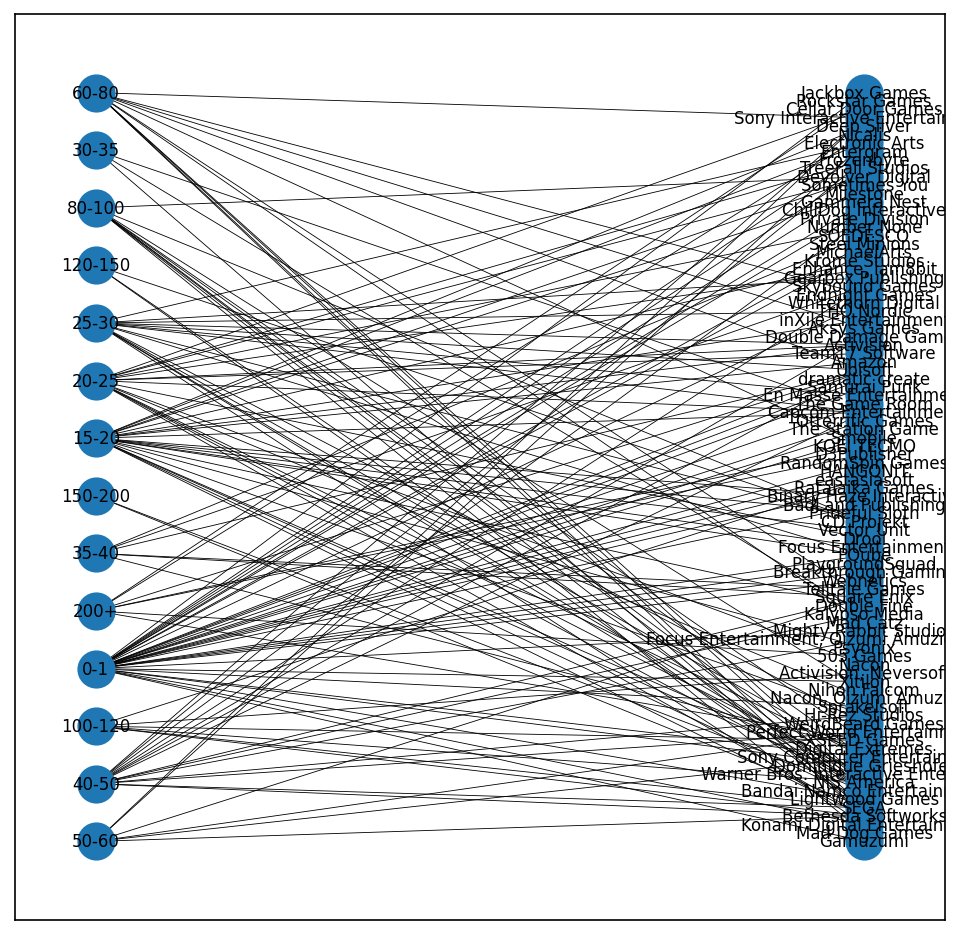

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(B)
fig, ax = plt.subplots(1,1, figsize=(8,8), dpi=150)
nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B,tghoanthanhgame),font_size=8,width=0.4)

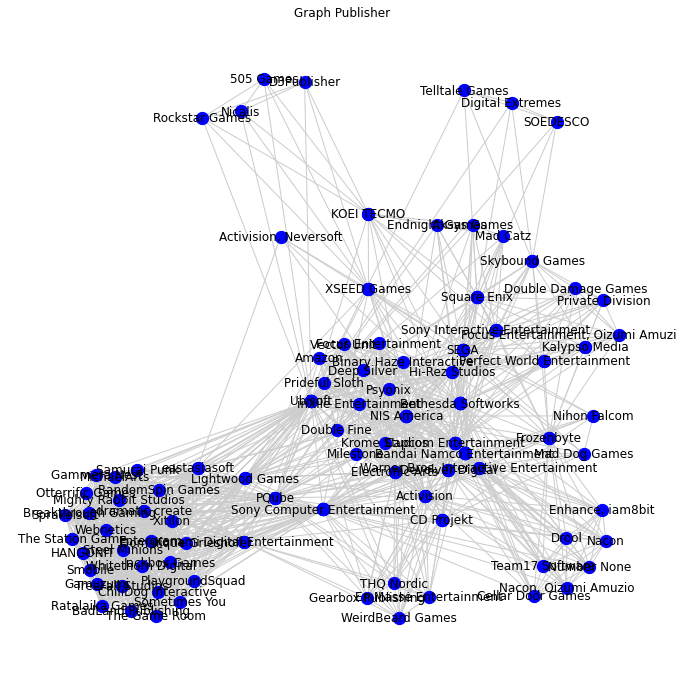

In [ ]:
G = bipartite.weighted_projected_graph(B,nhaphathanhgame)
plt.figure(figsize=(12,12))

layout = nx.spring_layout(G)

nx.draw_networkx_nodes(G,
                       layout,
                       nodelist=nhaphathanhgame,
                       node_size=150,
                       node_color='blue')
nx.draw_networkx_edges(G, layout, edge_color="#cccccc")
node_labels = dict(zip(nhaphathanhgame, nhaphathanhgame))
nx.draw_networkx_labels(G, layout, labels=node_labels)
plt.axis('off')

plt.title("Graph Publisher")

plt.show()

In [ ]:
labels = nx.get_edge_attributes(G,'weight')
df2 = pd.DataFrame(columns=['source', 'target', 'weight'])
for key, value in labels.items():
  df2 =df2.append({'source':key[0],'target':key[1],'weight':value}, ignore_index=True)
df2.to_csv(r'mydata.csv', index = False, header=True)

In [ ]:
df3 = df.to_csv(r'alldata.csv', index=False, header=True)

In [ ]:
b=nx.betweenness_centrality(G)

for k , v in reversed(sorted(b.items(), key=lambda item: item[1])):
  print(k,':',v)

Ubisoft : 0.22391122181898693
Sony Computer Entertainment : 0.11901091650577704
PQube : 0.06977480175129229
Lightwood Games : 0.05523595137229891
Bethesda Softworks : 0.052691125357062836
Capcom Entertainment : 0.037792903242158844
NIS America : 0.035033508474554775
Bandai Namco Entertainment : 0.021688417377931504
Devolver Digital : 0.016856545496806773
Activision : 0.016767704291947672
Konami Digital Entertainment : 0.01618503361353208
eastasiasoft : 0.01473259886181234
Square Enix : 0.014609487044341818
XSEED Games : 0.01377437702164867
Hi-Rez Studios : 0.01322549683741842
SEGA : 0.013031050211846947
Electronic Arts : 0.010595143577679579
Frozenbyte : 0.008644384285800244
KOEI TECMO : 0.007197784474543786
Warner Bros. Interactive Entertainment : 0.006588653090185265
Skybound Games : 0.006100717048417675
Sony Interactive Entertainment : 0.0028878113147776064
CD Projekt : 0.00211875430210466
Perfect World Entertainment : 0.00040158811226226955
Prideful Sloth : 0.0
Krome Studios : 0.0


In [ ]:
c=nx.closeness_centrality(G)

for k , v in reversed(sorted(c.items(), key=lambda item: item[1])):
  print(k,':',v)

Ubisoft : 0.7946428571428571
Sony Computer Entertainment : 0.7542372881355932
PQube : 0.7355371900826446
Lightwood Games : 0.7007874015748031
Bethesda Softworks : 0.6793893129770993
Capcom Entertainment : 0.6742424242424242
Konami Digital Entertainment : 0.6544117647058824
NIS America : 0.6496350364963503
Activision : 0.6312056737588653
eastasiasoft : 0.6312056737588653
Bandai Namco Entertainment : 0.6180555555555556
dramatic create : 0.6095890410958904
Otterrific Games : 0.6095890410958904
BadLand Publishing : 0.6095890410958904
Gammera Nest : 0.6095890410958904
The Station Game : 0.6095890410958904
TreeFall Studios : 0.6095890410958904
Gamuzumi : 0.6095890410958904
Mighty Rabbit Studios : 0.6095890410958904
Xitilon : 0.6095890410958904
Steel Minions : 0.6095890410958904
The Game Room : 0.6095890410958904
PlaygroundSquad : 0.6095890410958904
Samurai Punk : 0.6095890410958904
RandomSpin Games : 0.6095890410958904
Entergram : 0.6095890410958904
HANGONIT : 0.6095890410958904
Dominique Gr

In [ ]:
pr=nx.pagerank(G,0.85)

for k , v in reversed(sorted(pr.items(), key=lambda item: item[1])):
  print(k,':',v)

Ubisoft : 0.032936433802105425
Bethesda Softworks : 0.028828210365866955
Sony Computer Entertainment : 0.027194016316742464
Capcom Entertainment : 0.02533901566223796
PQube : 0.02370892502625395
NIS America : 0.023408798298185228
Bandai Namco Entertainment : 0.020621307755735906
Activision : 0.019229900842282058
Lightwood Games : 0.018912021824011787
Devolver Digital : 0.01776405960552908
SEGA : 0.01768874572067716
Konami Digital Entertainment : 0.016389062892877587
Square Enix : 0.016011036728633257
Electronic Arts : 0.015604944864657447
Warner Bros. Interactive Entertainment : 0.014442372712204358
Hi-Rez Studios : 0.014233353610053744
eastasiasoft : 0.013763336631131419
Sony Interactive Entertainment : 0.01300228809074151
Frozenbyte : 0.012420693559709149
dramatic create : 0.011591550498483455
Otterrific Games : 0.011591550498483455
BadLand Publishing : 0.011591550498483455
Gammera Nest : 0.011591550498483455
The Station Game : 0.011591550498483455
TreeFall Studios : 0.01159155049848

In [ ]:
eigenc = nx.eigenvector_centrality(G)

for k , v in reversed(sorted(eigenc.items(), key=lambda item: item[1])):
  print(k,':',v)

PQube : 0.19809279322400447
Sony Computer Entertainment : 0.1952639302114412
Ubisoft : 0.19459076325817154
Lightwood Games : 0.1905761496691936
Konami Digital Entertainment : 0.17806336977962023
eastasiasoft : 0.16890103584536564
dramatic create : 0.16196835875916699
Otterrific Games : 0.16196835875916699
BadLand Publishing : 0.16196835875916699
Gammera Nest : 0.16196835875916699
The Station Game : 0.16196835875916699
TreeFall Studios : 0.16196835875916699
Gamuzumi : 0.16196835875916699
Mighty Rabbit Studios : 0.16196835875916699
Xitilon : 0.16196835875916699
Steel Minions : 0.16196835875916699
The Game Room : 0.16196835875916699
PlaygroundSquad : 0.16196835875916699
Samurai Punk : 0.16196835875916699
RandomSpin Games : 0.16196835875916699
Entergram : 0.16196835875916699
HANGONIT : 0.16196835875916699
Dominique Grieshofer : 0.16196835875916699
Breakthrough Gaming : 0.16196835875916699
Ratalaika Games : 0.16196835875916699
Sometimes You : 0.16196835875916699
Smobile : 0.1619683587591669

In [ ]:
import matplotlib.cm as cm
import matplotlib
import community as community_louvain

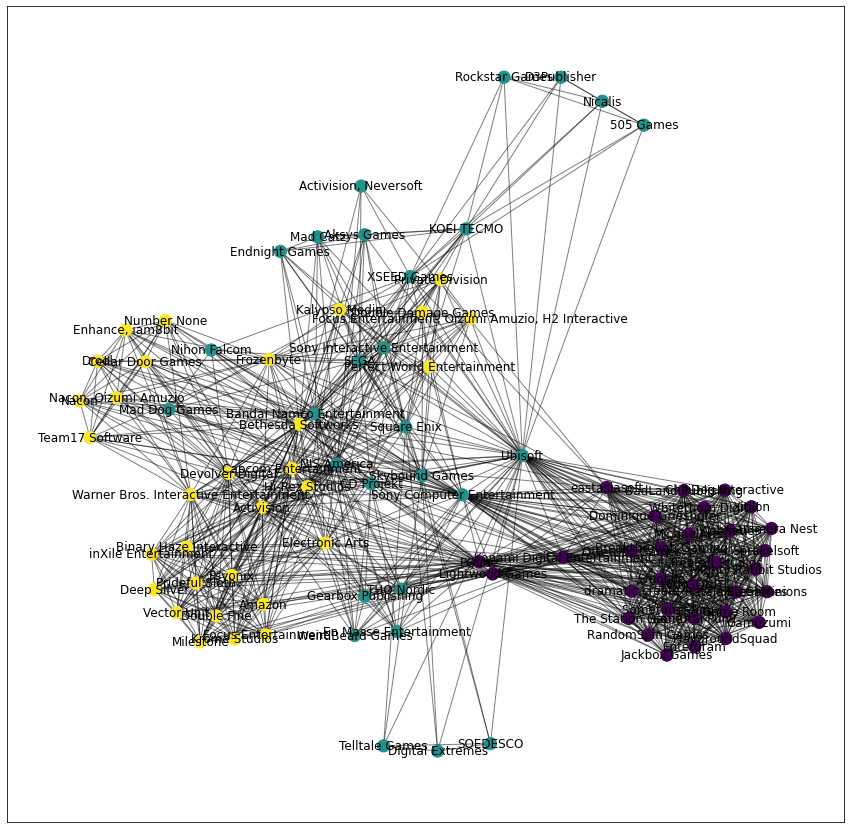

In [ ]:
from community import community_louvain
plt.figure(figsize=(15,15))

# compute thebesst partition
partition = community_louvain.best_partition(G)

#draw the graph
pos =nx.spring_layout(G)
#color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=150,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)

plt.show()

In [ ]:
values = list(partition.values())

print('Số lượng cộng đồng:', len(np.unique(values)), "\n")

for i in range(len(np.unique(values))):
  print("**************","Nhóm",i,"**************")
  for name, k in partition.items():
    if k == i:
      print(name)
  print("")

Số lượng cộng đồng: 3 

************** Nhóm 0 **************
Webnetics
Jackbox Games
eastasiasoft
Sprakelsoft
Whitethorn Digital
ChiliDog Interactive
MichaelArts
Lightwood Games
PQube
Smobile
Konami Digital Entertainment
Sometimes You
Ratalaika Games
Breakthrough Gaming
Dominique Grieshofer
HANGONIT
Entergram
RandomSpin Games
Samurai Punk
PlaygroundSquad
The Game Room
Steel Minions
Xitilon
Mighty Rabbit Studios
Gamuzumi
TreeFall Studios
The Station Game
Gammera Nest
BadLand Publishing
Otterrific Games
dramatic create

************** Nhóm 1 **************
Digital Extremes
KOEI TECMO
Ubisoft
Sony Interactive Entertainment
Square Enix
Mad Dog Games
THQ Nordic
XSEED Games
D3Publisher
Sony Computer Entertainment
SOEDESCO
Rockstar Games
Gearbox Publishing
Mad Catz
Bandai Namco Entertainment
En Masse Entertainment
505 Games
NIS America
Nicalis
Endnight Games
Nihon Falcom
Telltale Games
Skybound Games
CD Projekt
Aksys Games
Activision, Neversoft
WeirdBeard Games
SEGA

************** Nhóm 2 ***

In [ ]:
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

In [ ]:
def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

In [ ]:
# find communities in the graph
c = girvan_newman(G.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))

In [ ]:
node_groups

[['Gamuzumi',
  'Mad Dog Games',
  'SEGA',
  'Warner Bros. Interactive Entertainment',
  'Dominique Grieshofer',
  'XSEED Games',
  'Perfect World Entertainment',
  'WeirdBeard Games',
  'Hi-Rez Studios',
  'Nacon, Oizumi Amuzio',
  'Nihon Falcom',
  'Nacon',
  'Psyonix',
  'Focus Entertainment, Oizumi Amuzio, H2 Interactive',
  'Mighty Rabbit Studios',
  'Mad Catz',
  'Kalypso Media',
  'Double Fine',
  'Webnetics',
  'Breakthrough Gaming',
  'PQube',
  'Vector Unit',
  'CD Projekt',
  'Prideful Sloth',
  'Ratalaika Games',
  'eastasiasoft',
  'RandomSpin Games',
  'D3Publisher',
  'KOEI TECMO',
  'Capcom Entertainment',
  'The Game Room',
  'En Masse Entertainment',
  'dramatic create',
  'Ubisoft',
  'Team17 Software',
  'Activision',
  'Double Damage Games',
  'Aksys Games',
  'THQ Nordic',
  'Whitethorn Digital',
  'Endnight Games',
  'Skybound Games',
  'Gearbox Publishing',
  'Krome Studios',
  'Number None',
  'Private Division',
  'ChiliDog Interactive',
  'Milestone',
  'Some

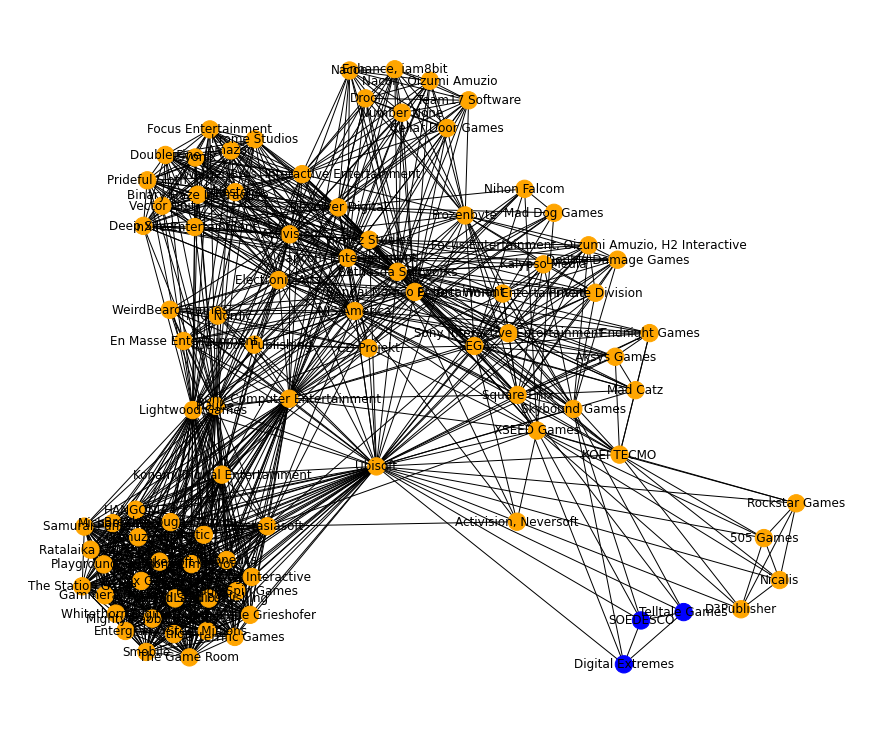

In [ ]:
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('orange')
    else: 
        color_map.append('blue')  

plt.figure(figsize=(12, 10))
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()